In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats  # Import stats module explicitly
%matplotlib inline

In [9]:
def read_world_bank_data(filename):
    # Read the CSV file into a DataFrame
    data_df = pd.read_csv(filename)
    # Pivot table for years as columns
    data_df_years = data_df.pivot_table(index=['CountryName',
                                               'CountryCode',
                                               'IndicatorName',
                                               'IndicatorCode'],
                                        columns='Year',
                                        values='Value').reset_index()
    # Pivot table for countries as columns
    data_df_countries = data_df_years.transpose().reset_index()
    # Set the first row as column headers
    data_df_countries.columns = data_df_countries.iloc[0]
    # Drop the first row after setting as column headers
    data_df_countries = data_df_countries[1:]
    # Reset index for better consistency
    data_df_countries.reset_index(drop=True, inplace=True)
    return data_df_years, data_df_countries
# Example usage:
years_df, countries_df = read_world_bank_data('WDIData_T.csv')
# Display the resulting DataFrames
print("Years DataFrame:")
print(years_df.head())
print("\nCountries DataFrame:")
countries_df.head()

Years DataFrame:
Year  CountryName CountryCode  \
0     Afghanistan         AFG   
1     Afghanistan         AFG   
2     Afghanistan         AFG   
3     Afghanistan         AFG   
4     Afghanistan         AFG   

Year                                      IndicatorName      IndicatorCode  \
0     ARI treatment (% of children under 5 taken to ...     SH.STA.ARIC.ZS   
1     Access to clean fuels and technologies for coo...     EG.CFT.ACCS.ZS   
2               Access to electricity (% of population)     EG.ELC.ACCS.ZS   
3     Access to electricity, rural (% of rural popul...  EG.ELC.ACCS.RU.ZS   
4     Access to electricity, urban (% of urban popul...  EG.ELC.ACCS.UR.ZS   

Year  1960  1961  1962  1963  1964  1965  ...       2011       2012  \
0      NaN   NaN   NaN   NaN   NaN   NaN  ...  60.500000        NaN   
1      NaN   NaN   NaN   NaN   NaN   NaN  ...  22.330000  24.080000   
2      NaN   NaN   NaN   NaN   NaN   NaN  ...  43.222019  69.100000   
3      NaN   NaN   NaN   NaN   

,CountryName,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,...,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe
0,CountryCode,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,...,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE
1,IndicatorName,ARI treatment (% of children under 5 taken to ...,Access to clean fuels and technologies for coo...,Access to electricity (% of population),"Access to electricity, rural (% of rural popul...","Access to electricity, urban (% of urban popul...",Account ownership at a financial institution o...,Account ownership at a financial institution o...,Account ownership at a financial institution o...,Account ownership at a financial institution o...,...,Women participating in the three decisions (ow...,Women who believe a husband is justified in be...,Women who believe a husband is justified in be...,Women who believe a husband is justified in be...,Women who believe a husband is justified in be...,Women who believe a husband is justified in be...,Women who believe a husband is justified in be...,Women who were first married by age 15 (% of w...,Women who were first married by age 18 (% of w...,Women's share of population ages 15+ living wi...
2,IndicatorCode,SH.STA.ARIC.ZS,EG.CFT.ACCS.ZS,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,FX.OWN.TOTL.ZS,FX.OWN.TOTL.FE.ZS,FX.OWN.TOTL.MA.ZS,FX.OWN.TOTL.OL.ZS,...,SG.DMK.ALLD.FN.ZS,SG.VAW.REAS.ZS,SG.VAW.ARGU.ZS,SG.VAW.BURN.ZS,SG.VAW.GOES.ZS,SG.VAW.NEGL.ZS,SG.VAW.REFU.ZS,SP.M15.2024.FE.ZS,SP.M18.2024.FE.ZS,SH.DYN.AIDS.FE.ZS
3,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
selected_countries = ['France', 'Netherlands', 'Nepal']

# Select indicators of interest
selected_indicators = ['CO2 emissions from gaseous fuel consumption (kt)',
                       'Urban population (% of total population)',
                       'Cereal yield (kg per hectare)']

# Filter data for selected countries and indicators
filtered_data = years_df[years_df['CountryName'].isin(selected_countries) &
                         years_df['IndicatorName'].isin(selected_indicators)]

# Display summary statistics using .describe()
summary_stats = filtered_data.describe()

# Additional statistical methods (mean and standard deviation)
mean_values = filtered_data.mean()
std_dev_values = filtered_data.std()

# Display results
print("Summary Statistics:")
print(summary_stats)

print("\nMean Values:")
print(mean_values)

print("\nStandard Deviation:")
print(std_dev_values)

Summary Statistics:
Year          1960         1961         1962         1963          1964  \
count     6.000000     9.000000     9.000000     9.000000      9.000000   
mean   1077.559167  1861.322111  2136.256333  2160.027667   2313.364778   
std    2273.827694  2615.570682  3077.116406  3127.606430   3278.911749   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%      17.548000    60.020000    60.204000    60.387000     60.570000   
50%      60.816000   880.080000   964.421000  1118.435000   1540.140000   
75%     502.264250  2275.900000  2689.700000  2769.400000   2823.400000   
max    5691.184000  7931.721000  9325.181000  9592.872000  10047.580000   

Year           1965          1966          1967          1968          1969  \
count      9.000000      9.000000      9.000000      9.000000      9.000000   
mean    2430.809444   2735.791667   3551.637222   4525.498778   4946.974000   
std     3243.952701   3564.375598   4635.077417   6542.160880   732

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\3990031130.py:16: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = filtered_data.mean()
C:\Users\HP\AppData\Local\Temp\ipykernel_13152\3990031130.py:17: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std_dev_values = filtered_data.std()


In [58]:
# List of countries to filter
# Read the CSV file into a DataFrame
data_df = pd.read_csv('WDIData_T.csv')
Country_filter = ['Aruba',
                  'Ireland',
                  'Nigeria']
filter_indicator = ['CO2 emissions from gaseous fuel consumption (kt)',
                    'Urban population (% of total population)',
                    'Domestic credit to private sector by banks (% of GDP)',
                    'Agricultural land (sq. km)',
                    'Cereal yield (kg per hectare)']
filtered_data_df = data_df[(data_df['CountryName'].isin(Country_filter)) &
                           (data_df['IndicatorName'].isin(filter_indicator))]
filtered_data_df

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
8473,Aruba,ABW,CO2 emissions from gaseous fuel consumption (kt),EN.ATM.CO2E.GF.KT,1960,0.000000
8555,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,1960,50.776000
20958,Ireland,IRL,CO2 emissions from gaseous fuel consumption (kt),EN.ATM.CO2E.GF.KT,1960,0.000000
21110,Ireland,IRL,Urban population (% of total population),SP.URB.TOTL.IN.ZS,1960,45.184000
27590,Nigeria,NGA,CO2 emissions from gaseous fuel consumption (kt),EN.ATM.CO2E.GF.KT,1960,0.000000
...,...,...,...,...,...,...
7486053,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,2019,43.546000
7518304,Ireland,IRL,Domestic credit to private sector by banks (% ...,FD.AST.PRVT.GD.ZS,2019,36.966686
7518706,Ireland,IRL,Urban population (% of total population),SP.URB.TOTL.IN.ZS,2019,63.405000
7537862,Nigeria,NGA,Domestic credit to private sector by banks (% ...,FD.AST.PRVT.GD.ZS,2019,10.430729


In [74]:
new_data = filtered_data_df[filtered_data_df['IndicatorName'] == 'CO2 emissions from gaseous fuel consumption (kt)']['Value'].values

# Calculate skewness and kurtosis using scipy.stats
skewness_value = stats.skew(new_data)
kurtosis_value = stats.kurtosis(new_data, fisher=False)  # Set fisher=False for excess kurtosis

print("Skewness:", skewness_value)
print("Kurtosis:", kurtosis_value)

# Bootstrap for mean and standard deviation using scipy.stats
def bootstrap_scipy(dist, function, confidence_level=0.682, nboot=10000):
    fvalues = np.array([])  # creates an empty array to store function values
    dlen = len(dist)
    for i in range(nboot):
        rand = np.random.choice(dist, dlen, replace=True)
        f = function(rand)
        fvalues = np.append(fvalues, f)

    # Calculate confidence interval using percentiles
    qlow = 100 * (1 - confidence_level) / 2.0
    qhigh = 100 * (1 + confidence_level) / 2.0

    low = np.percentile(fvalues, qlow)
    high = np.percentile(fvalues, qhigh)

    return low, high

mean_low, mean_high = bootstrap_scipy(new_data, np.mean, confidence_level=0.682)
std_low, std_high = bootstrap_scipy(new_data, np.std, confidence_level=0.682)

mean_sigma = 0.5 * (mean_high - mean_low)
std_sigma = 0.5 * (std_high - std_low)

print("Mean:", np.round(np.mean(new_data), 4), "+/-", np.round(mean_sigma, 4))
print("Standard Deviation:", np.round(np.std(new_data), 4), "+/-", np.round(std_sigma, 4))

Skewness: 1.9201534054145613
Kurtosis: 6.64976062688814
Mean: 9766.4412 +/- 555.8636
Standard Deviation: 7267.7411 +/- 668.5264


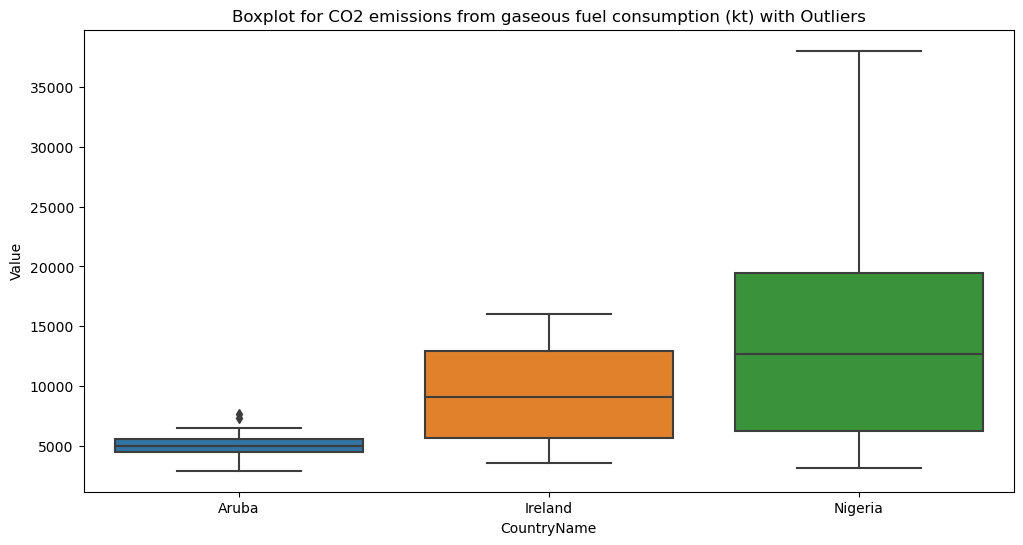

In [69]:
# Filter data for selected countries and indicators
filter_indicator = ['CO2 emissions from gaseous fuel consumption (kt)',
                    'Urban population (% of total population)',
                    'Domestic credit to private sector by banks (% of GDP)',
                    'Agricultural land (sq. km)',
                    'Cereal yield (kg per hectare)']

filtered_data_df = data_df[(data_df['CountryName'].isin(Country_filter)) &
                           (data_df['IndicatorName'].isin(filter_indicator))]

# Select indicator of interest for introducing outliers
outlier_indicator = 'CO2 emissions from gaseous fuel consumption (kt)'

# Create outliers for 'CO2 emissions from gaseous fuel consumption (kt)'
for country in Country_filter:
    country_data = filtered_data_df[
        (filtered_data_df['CountryName'] == country) &
        (filtered_data_df['IndicatorName'] == outlier_indicator)
    ]
    num_outliers = len(country_data)
    filtered_data_df.loc[
        (filtered_data_df['CountryName'] == country) &
        (filtered_data_df['IndicatorName'] == outlier_indicator),
        'Value'
    ] += np.random.normal(5000, 1000, num_outliers)

# Visualize outliers using a boxplot
new = filtered_data_df[filtered_data_df['IndicatorName'] == outlier_indicator]
plt.figure(figsize=(12, 6))
sns.boxplot(x='CountryName',
            y='Value',
            data=new)
plt.title(f'Boxplot for {outlier_indicator} with Outliers')
plt.show()

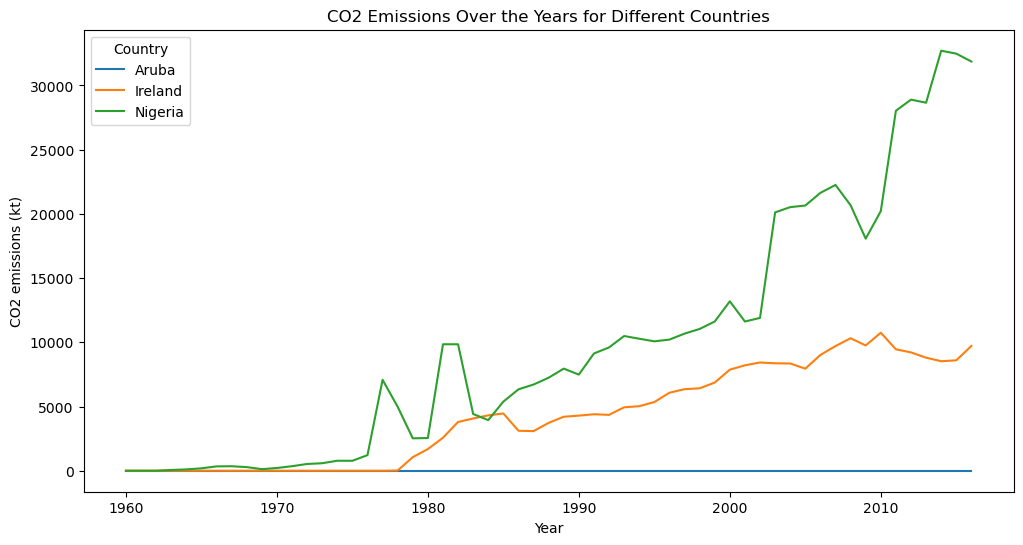

In [23]:
# Line Plot: CO2 emissions over the years for different countries

new = (
    filtered_data_df['IndicatorName'] == 'CO2 emissions from gaseous fuel consumption (kt)')
g = filtered_data_df[new]
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year',
             y='Value',
             hue='CountryName',
             data=g)
plt.title('CO2 Emissions Over the Years for Different Countries')
plt.xlabel('Year')
plt.ylabel('CO2 emissions (kt)')
plt.legend(title='Country')
plt.show()

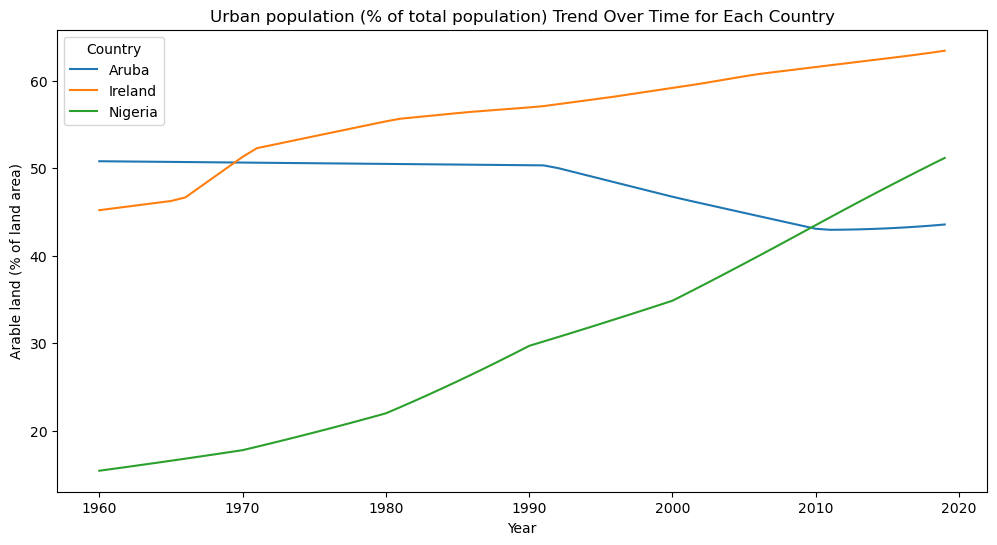

In [25]:
# Line Plot: Urban population Trend over the years for different countries
fg = filtered_data_df['IndicatorName'] == 'Urban population (% of total population)'
s = filtered_data_df[fg]
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year',
             y='Value',
             hue='CountryName',
             data=s)
plt.title('Urban population (% of total population) Trend Over Time for Each Country')
plt.xlabel('Year')
plt.ylabel('Arable land (% of land area)')
plt.legend(title='Country')
plt.show()


In [26]:
filtered_data_df.describe()

,Year,Value
count,744.000000,744.000000
mean,1989.892473,52384.829281
std,16.786499,165051.593317
min,1960.000000,0.000000
25%,1975.000000,20.000000
50%,1990.500000,56.741000
75%,2004.250000,6532.525000
max,2019.000000,737000.000000


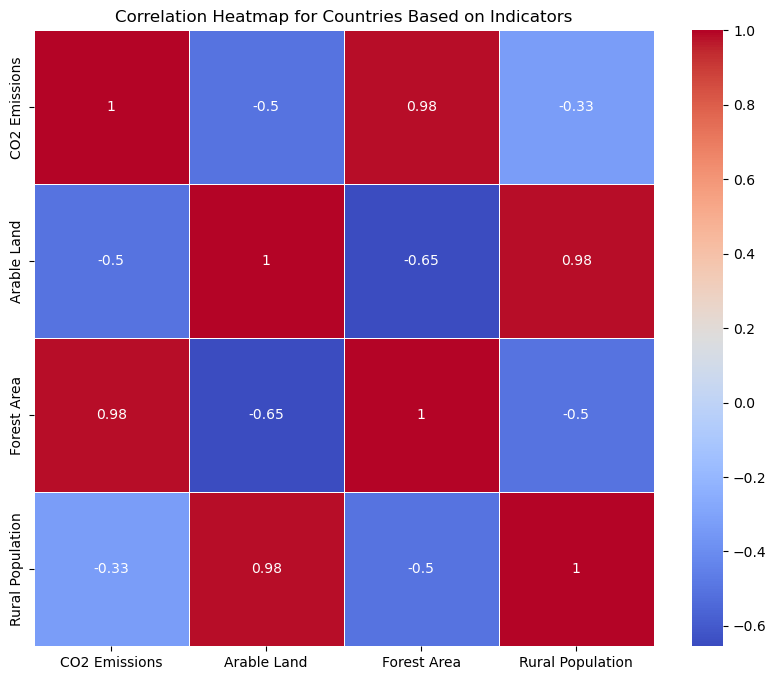

In [30]:
# We are taking a small section of our dataset for correlation heatmap
data = {
    'CountryName': ['Aruba',
                    'Ireland',
                    'Nigeria'],
    'CO2 Emissions': [4500, 3000, 6000],
    'Arable Land': [30, 20, 10],
    'Forest Area': [20, 15, 30],
    'Rural Population': [5000000, 3000000, 2000000]
}

data_df_countries = pd.DataFrame(data)

# Set 'CountryName' as the index for correlation calculation
data_df_countries.set_index('CountryName', inplace=True)

# Select only numeric columns for correlation calculation
numeric_columns = data_df_countries.select_dtypes(include='number').columns
correlation_matrix = data_df_countries[numeric_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for Countries Based on Indicators')
plt.show()


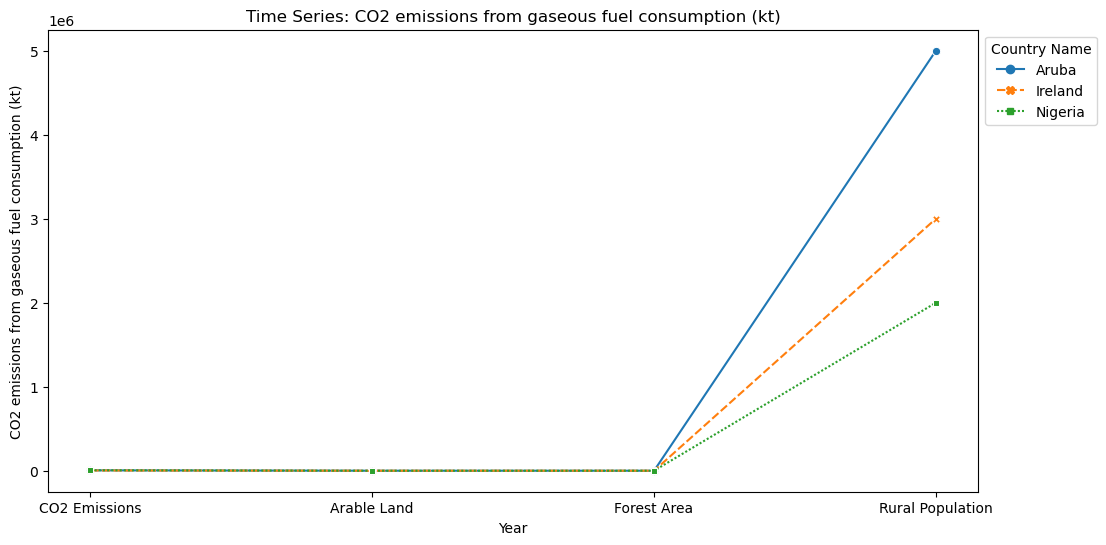

In [32]:
# Provided data
data = {
    'CountryName': ['Aruba',
                    'Ireland',
                    'Nigeria'],
    'CO2 Emissions': [4500, 3000, 6000],
    'Arable Land': [30, 20, 10],
    'Forest Area': [20, 15, 30],
    'Rural Population': [5000000, 3000000, 2000000]
}

# Create a DataFrame
data_df_countries = pd.DataFrame(data)

# Set the 'Country Name' column as the index
data_df_countries.set_index('CountryName', inplace=True)

# Transpose the dataframe for better visualization
data_df_countries_transposed = data_df_countries.transpose()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_df_countries_transposed, markers=True)
plt.title('Time Series: CO2 emissions from gaseous fuel consumption (kt)')
plt.xlabel('Year')
plt.ylabel('CO2 emissions from gaseous fuel consumption (kt)')
plt.legend(title='Country Name', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


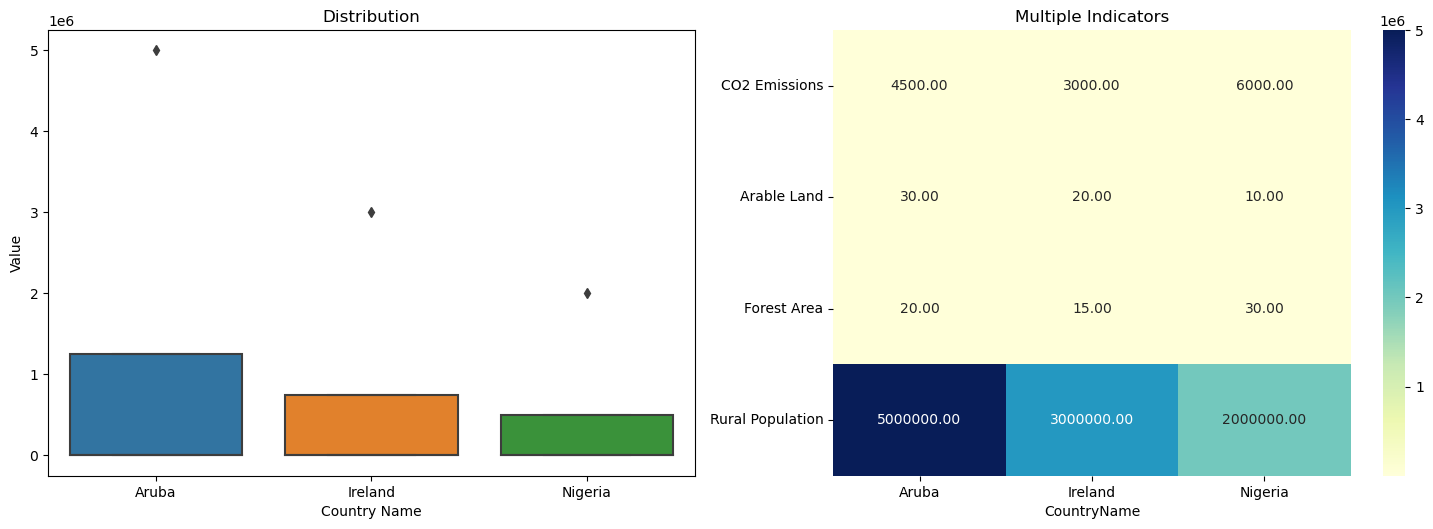

In [52]:
data = {
    'CountryName': ['Aruba',
                    'Ireland',
                    'Nigeria'],
    'CO2 Emissions': [4500, 3000, 6000],
    'Arable Land': [30, 20, 10],
    'Forest Area': [20, 15, 30],
    'Rural Population': [5000000, 3000000, 2000000]
}
# Create a DataFrame
data_df = pd.DataFrame(data)

# Set the 'Country Name' column as the index
data_df.set_index('CountryName', inplace=True)

# Transpose the dataframe for better visualization
data_df_transposed = data_df.transpose()

# Drop the row with indicator names

# Plotting different visualizations
plt.figure(figsize=(15, 10))

# Box plot
plt.subplot(2, 2, 3)
sns.boxplot(data=data_df_transposed.astype(float))
plt.title('Distribution')
plt.xlabel('Country Name')
plt.ylabel('Value')

# Heatmap
plt.subplot(2, 2, 4)
sns.heatmap(data_df_transposed.astype(float),
            cmap='YlGnBu',
            annot=True,
            fmt=".2f")
plt.title('Multiple Indicators')

plt.tight_layout()
plt.show()
